# KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)


# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


* SimpleRNN
* GRU
* LSTM
* ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)


ConvLSTM2Dのサンプルコード


[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。



In [35]:
!pip uninstall tensorflow -y

In [36]:
!pip uninstall keras -y

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1


In [37]:
!pip install tensorflow-gpu==1.14.0

In [1]:
!pip install keras==2.3.1

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, GRU, LSTM
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import backend as K

In [3]:
from keras.datasets import reuters
from keras.datasets import imdb

### データセット読み込み・IMDB

In [4]:
# データセット読み込み
# kerasのexampleそのまんまコピペ
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print(x_train)
print(y_train)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')

Loading data...
25000 train sequences
25000 test sequences
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 53

### SimpleRNN

In [5]:
# SimpleRNNモデル作成
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [6]:
# コンパイルから出力、評価まで
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.6879 - accuracy: 0.5385 - val_loss: 0.6563 - val_accuracy: 0.5883
Epoch 2/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.6056 - accuracy: 0.6611 - val_loss: 0.6212 - val_accuracy: 0.6356
Epoch 3/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.5364 - accuracy: 0.7270 - val_loss: 0.5573 - val_accuracy: 0.7200
Epoch 4/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.4745 - accuracy: 0.7712 - val_loss: 0.6172 - val_accuracy: 0.6648
Epoch 5/5
25000/25000 [==============================] - 5s 198us/step
Test score: 0.572650809879303
Test accuracy: 0.7155600190162659


### GRU

In [7]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 64s 3ms/step - loss: 1.8400 - accuracy: 0.7278 - val_loss: 0.5752 - val_accuracy: 0.6942
Epoch 2/5
25000/25000 [==============================] - 64s 3ms/step - loss: 0.3877 - accuracy: 0.8313 - val_loss: 0.5221 - val_accuracy: 0.7383
Epoch 3/5
25000/25000 [==============================] - 65s 3ms/step - loss: 0.4728 - accuracy: 0.8599 - val_loss: 0.5815 - val_accuracy: 0.6833
Epoch 4/5
25000/25000 [==============================] - 64s 3ms/step - loss: 0.8101 - accuracy: 0.8413 - val_loss: 0.5590 - val_accuracy: 0.7184
Epoch 5/5
25000/25000 [==============================] - 12s 483us/step
Test score: 0.57525415391922
Test accuracy: 0.7196400165557861


### LSTM

In [9]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 55s 2ms/step - loss: 0.4595 - accuracy: 0.7820 - val_loss: 0.3666 - val_accuracy: 0.8390
Epoch 2/5
25000/25000 [==============================] - 55s 2ms/step - loss: 0.3017 - accuracy: 0.8783 - val_loss: 0.4266 - val_accuracy: 0.8272
Epoch 3/5
25000/25000 [==============================] - 56s 2ms/step - loss: 0.2210 - accuracy: 0.9133 - val_loss: 0.4262 - val_accuracy: 0.8285
Epoch 4/5
25000/25000 [==============================] - 56s 2ms/step - loss: 0.1558 - accuracy: 0.9410 - val_loss: 0.4537 - val_accuracy: 0.8216
Epoch 5/5
25000/25000 [==============================] - 10s 395us/step
Test score: 0.5242641820526123
Test accuracy: 0.8083999752998352


* SimpleRNN
 
Test score: 0.572650809879303

Test accuracy: 0.7155600190162659

* GNU

Test score: 0.57525415391922

Test accuracy: 0.7196400165557861

* LSTM

Test score: 0.5242641820526123

Test accuracy: 0.8083999752998352


結果としては
LSTM > GRU > SimpleRNN
となった。

LSTMが非常に良いスコアになった。

### ConvLSTM2D

In [76]:
K.clear_session()

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization (BatchNo (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  1

Epoch 1/3
95/95 [==============================] - 33s 348ms/step - loss: 0.6832 - val_loss: 0.6524
Epoch 2/3
95/95 [==============================] - 32s 341ms/step - loss: 0.6609 - val_loss: 0.6435
Epoch 3/3
95/95 [==============================] - 32s 340ms/step - loss: 0.6415 - val_loss: 0.6482


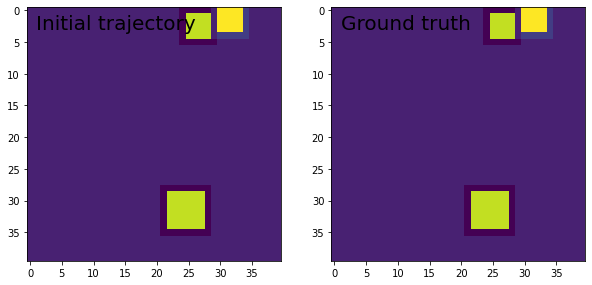

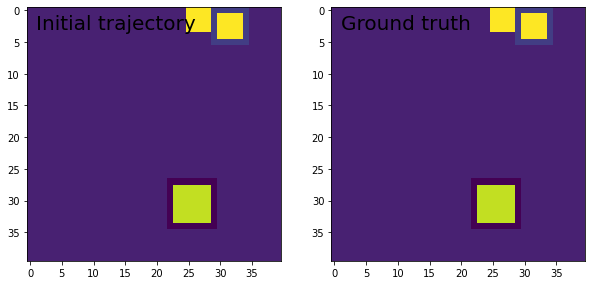

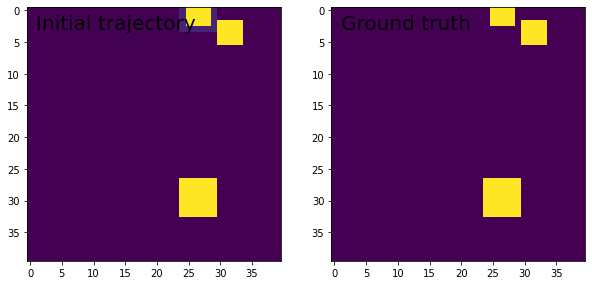

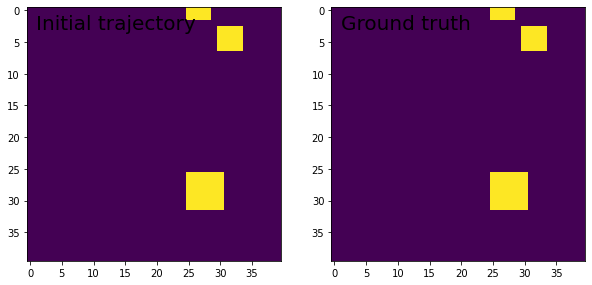

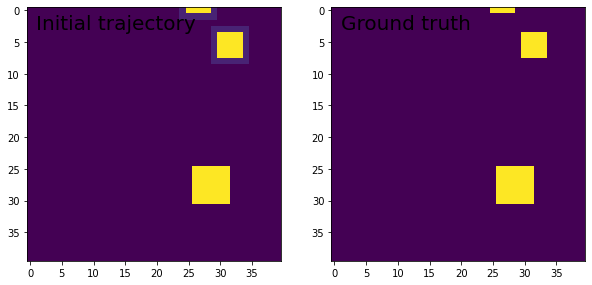

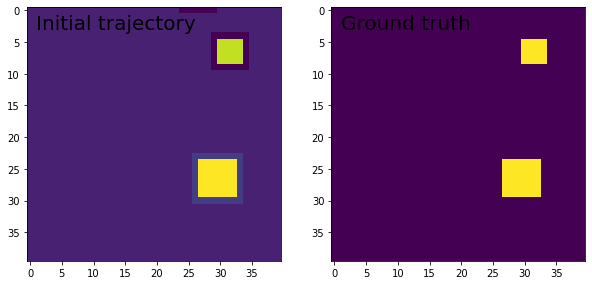

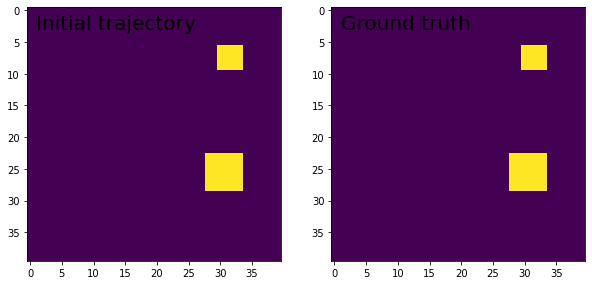

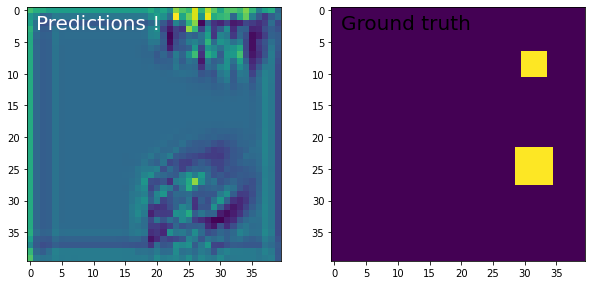

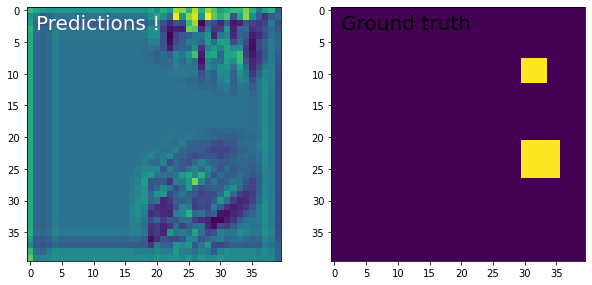

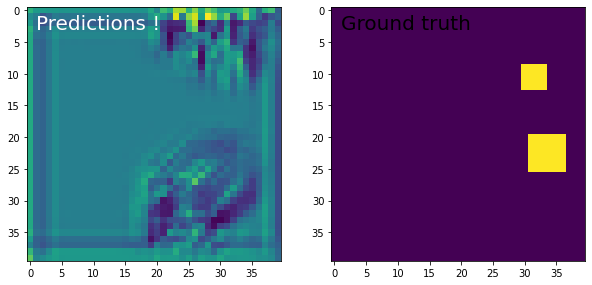

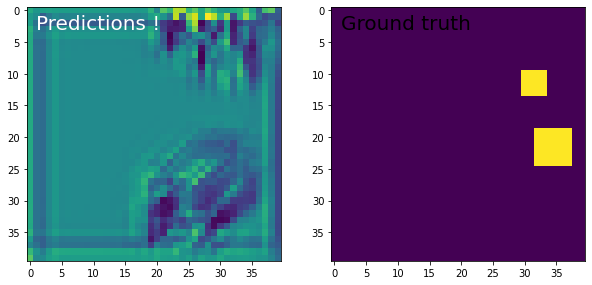

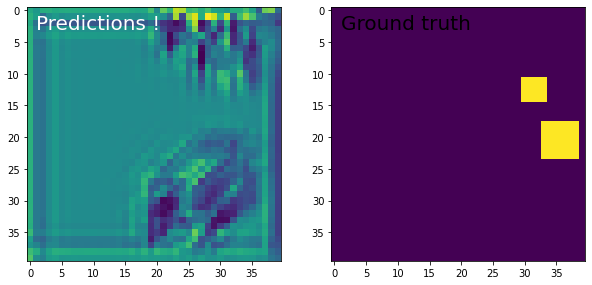

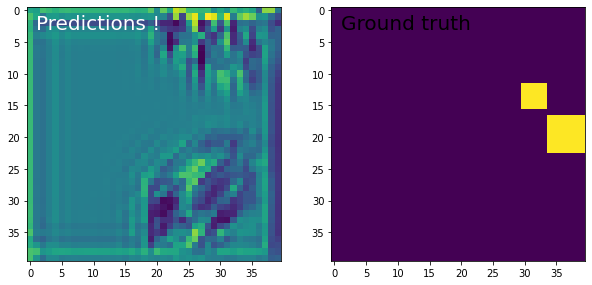

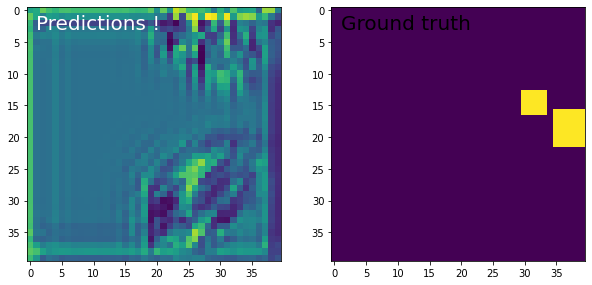

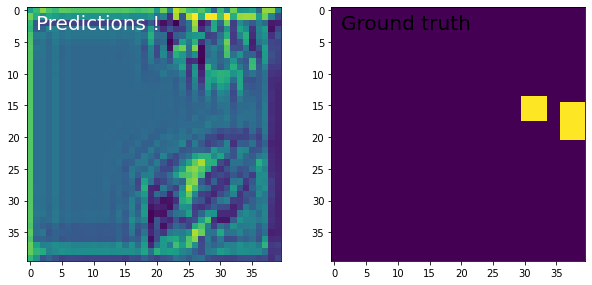

In [79]:
seq.compile(loss='binary_crossentropy', optimizer='adadelta')
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

In [65]:
# データセット読み込み
# kerasのexampleそのまんまコピペ
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print(x_train.shape)
print(y_train.shape)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')

Loading data...
8982 train sequences
2246 test sequences
(8982,)
(8982,)
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...


In [66]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.fit_transform(y_test[:, np.newaxis])

In [67]:
type(y_train)

numpy.ndarray

In [70]:
y_train.shape

(8982, 46)

ロイターのニュースワイヤーをSimpleRNNとLSTMで回してみる

In [23]:
tf.__version__

'2.3.0'

In [24]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [25]:
!nvidia-smi

Thu Oct  8 05:29:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    35W / 250W |    361MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so*

lrwxrwxrwx 1 root root        29 Oct  4 04:23 /usr/lib/x86_64-linux-gnu/libcudnn.so -> /etc/alternatives/libcudnn_so
lrwxrwxrwx 1 root root        17 Oct 27  2019 /usr/lib/x86_64-linux-gnu/libcudnn.so.7 -> libcudnn.so.7.6.5
-rw-r--r-- 1 root root 428711256 Oct 27  2019 /usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5


In [27]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [28]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2102544886093030692, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14036618482667178368
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14002871379725990931
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15694748736
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 815221943571353021
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

### SimpleRNN

In [71]:
# SimpleRNNモデル作成
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 2,598,830
Trainable params: 2,598,830
Non-trainable params: 0
_________________________________________________________________


In [74]:

# コンパイルから出力、評価まで
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/5
281/281 [==============================] - 33s 119ms/step - loss: 1.9478 - accuracy: 0.4772 - val_loss: 1.9597 - val_accuracy: 0.4813
Epoch 2/5
281/281 [==============================] - 33s 116ms/step - loss: 1.8705 - accuracy: 0.4864 - val_loss: 2.6294 - val_accuracy: 0.4043
Epoch 3/5
281/281 [==============================] - 33s 116ms/step - loss: 1.7100 - accuracy: 0.5498 - val_loss: 1.8670 - val_accuracy: 0.5272
Epoch 4/5
281/281 [==============================] - 33s 117ms/step - loss: 1.5895 - accuracy: 0.5902 - val_loss: 1.7824 - val_accuracy: 0.5668
Epoch 5/5
71/71 [==============================] - 1s 7ms/step - loss: 1.8382 - accuracy: 0.5543
Test score: 1.838217854499817
Test accuracy: 0.5543187856674194


### LSTM

In [75]:
# SimpleRNNモデル作成
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

# コンパイルから出力、評価まで
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 2,697,518
Trainable params: 2,697,518
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/5
281/281 [==============================] - 92s 327ms/step - loss: 2.2490 - accuracy: 0.4275 - val_loss: 2.2421 - val_accuracy: 0.3762
Epoch 2/5
281/281 [==============================] - 92s 329ms/step - loss: 2.0165 - accuracy: 0.4940 - val_loss: 1.8275 - val_accuracy: 0.5107
Epoch 3/5
281/281 [==============================] - 92s 329ms/step - loss: 1.6

* SimpleRNN

Test score: 1.838217854499817

Test accuracy: 0.5543187856674194

* LSTM

Test score: 1.550624966621399

Test accuracy: 0.5966162085533142

問題1ほどは開かなかったが、やはりLSTMの方が結果が良かった。
ゲート付RNNの方が良い結果が出る可能性が高い。

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


* RNN

>Recurrentレイヤーに対する基底クラス。cell内部処理を設定する必要がある。

* SimpleRNNCell

>SimpleRNNのcell内部処理クラス。SimpleRNNを使うときにcellを弄りたかったら呼び出す？
RNN＋SimpleRNNCell = SimpleRNNらしい。

* GRUCell

>GRUのcell内部処理クラス。ゲート設定が可能。

* LSTMCell

>LSTMのcell内部処理クラス。ゲート設定が可能。GRUと比較して、forget gateが追加されている。

* StackedRNNCells

>RNNセルに深さを与える機能。再帰ネットワークにDNNのように深さを付与することによって、入力の特徴量をより抽象的に捉えることが可能となる。このモジュールでは一つのセル内で複数のRNNCellを実装することができる。RNNの回路そのものを複数スタックすることも可能。

* CuDNNGRU

>CuDNNを利用した高速なGRU実装。
TensorFlowバックエンドでGPU上でのみ動作します。

* CuDNNLSTM

>CuDNNを利用した高速なLSTM実装。
TensorFlowバックエンドでGPU上でのみ動作します。